## Kartenproblem

Generation  0 :  10  population. Highest fitness:  -4 best pop:  [3, 0, 2, 4, 0, 2]
Generation  1 :  9  population. Highest fitness:  -4 best pop:  [1, 0, 2, 4, 0, 2]
Generation  2 :  9  population. Highest fitness:  -4 best pop:  [3, 2, 4, 3, 0, 4]
Generation  3 :  9  population. Highest fitness:  -4 best pop:  [3, 2, 4, 3, 0, 4]
Generation  4 :  9  population. Highest fitness:  -4 best pop:  [3, 2, 4, 3, 0, 4]
Generation  5 :  9  population. Highest fitness:  -4 best pop:  [3, 2, 4, 0, 4, 4]
Generation  6 :  9  population. Highest fitness:  -3 best pop:  [0, 2, 4, 0, 4, 4]
Generation  7 :  9  population. Highest fitness:  -3 best pop:  [0, 2, 4, 0, 4, 4]
Generation  8 :  9  population. Highest fitness:  -3 best pop:  [0, 2, 4, 0, 4, 0]
Generation  9 :  9  population. Highest fitness:  -3 best pop:  [0, 1, 4, 0, 4, 4]
Generation  10 :  9  population. Highest fitness:  -3 best pop:  [0, 4, 3, 0, 4, 0]
Generation  11 :  9  population. Highest fitness:  -3 best pop:  [0, 2, 4, 0, 4, 0]
G

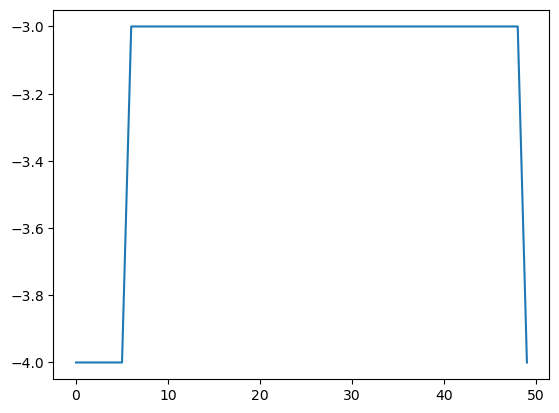

In [32]:
import random
import matplotlib.pyplot as plt


maxGeneration = 50
tournamentSize = 3
tournamentAmount = 3
mutationChance = 0.1

recording = {}

connections = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4)]

def generatePop():
    pop = [random.randint(0,4) for i in range(6)]
    return pop


def calculateFitness(pop):
    fitness = 0
    for conn in connections:
        if(pop[conn[0]] == pop[conn[1]]):
            fitness -= 2
    seen = set()
    for color in pop:
        if(color not in seen):
            fitness -=1
        seen.add(color)

    return fitness

def tournament(contestants):
    highest = contestants[0]
    score = calculateFitness(highest)
    for contestant in contestants:
        if(calculateFitness(contestant) > score):
            highest = contestant
            score = calculateFitness(highest)
    return highest


def mate(parent1, parent2):
    child = []
    for i in range(6):
        if(random.randint(0,1) == 1):
            child.append( parent1[i])
        else:
            child.append( parent2[i])
    return child

def mutate(child):
    new_child = []
    for color in child:
        if random.random() < mutationChance:
            color = random.randint(0,4)
        new_child.append(color)
    return new_child

startingPop = [generatePop() for i in range(10)]
matingPool=[]

solution = []

for generation in range(maxGeneration):

    #analize generation
    solved = False
    highest = calculateFitness(startingPop[0])
    highestPop = startingPop[0]
    for i in startingPop:
        if(calculateFitness(i) > highest):
            highest = calculateFitness(i)
            highestPop = i
        if(calculateFitness(i) >= 0):
            print("Problem solved: ", i)
            solved = True
    
    recording[generation] = highest
    if(solved):
        break
    else:
        print("Generation ", generation, ": ", len(startingPop), " population. Highest fitness: ", highest, "best pop: ", highestPop)

    #do tournaments
    matingPool = []
    for j in range(tournamentAmount):
        contestants = []
        for i in range(tournamentSize):
            contestants.append(random.choice(startingPop))
            matingPool.append(tournament(contestants))
    
    #mating & mutation
    matingAmount = tournamentSize * tournamentAmount

    startingPop = []
    for i in range(matingAmount):
        newChild = mutate(mate(random.choice(matingPool), random.choice(matingPool)))
        startingPop.append(newChild)

print(recording)

generations = list(recording.keys())
fitness = list(recording.values())

plt.plot(generations, fitness)
plt.show()